In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('uber.csv')

In [3]:
df1.shape

(200000, 9)

In [4]:
df = df1.sample(n=2100)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 72680 to 8670
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2100 non-null   int64  
 1   key                2100 non-null   object 
 2   fare_amount        2100 non-null   float64
 3   pickup_datetime    2100 non-null   object 
 4   pickup_longitude   2100 non-null   float64
 5   pickup_latitude    2100 non-null   float64
 6   dropoff_longitude  2100 non-null   float64
 7   dropoff_latitude   2100 non-null   float64
 8   passenger_count    2100 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 164.1+ KB


In [6]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
72680,21833131,2010-02-11 10:46:03.0000003,5.3,2010-02-11 10:46:03 UTC,-74.010170,40.712323,-74.006746,40.711744,1
104024,50243526,2010-02-18 22:41:00.000000131,7.3,2010-02-18 22:41:00 UTC,-73.970843,40.713202,-74.000425,40.714372,2
176274,40627962,2009-04-15 00:01:40.0000002,13.3,2009-04-15 00:01:40 UTC,-73.982079,40.762284,-73.915785,40.743786,1
22663,9275754,2009-10-16 18:29:36.0000001,6.5,2009-10-16 18:29:36 UTC,-73.995324,40.739432,-73.983012,40.734760,2
20045,11654316,2012-08-25 00:45:00.00000068,5.7,2012-08-25 00:45:00 UTC,-73.979758,40.743512,-73.973872,40.759907,6


In [7]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.100000e+03,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,2.796273e+07,11.314467,-72.319566,39.819779,-72.355122,39.858305,1.720476
std,1.599229e+07,14.488083,10.945000,6.089593,10.830618,5.966318,1.331432
min,5.788900e+04,-3.500000,-74.046425,0.000000,-74.177919,0.000000,0.000000
25%,1.434061e+07,6.000000,-73.991722,40.734744,-73.991162,40.734153,1.000000
50%,2.808004e+07,8.500000,-73.981319,40.752742,-73.980583,40.752787,1.000000
75%,4.181920e+07,12.500000,-73.966506,40.767833,-73.963701,40.768331,2.000000
max,5.541551e+07,499.000000,0.000000,40.849957,0.000000,40.905410,6.000000


In [8]:
df=df.drop(columns=['Unnamed: 0','key'])

In [9]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['dropoff_latitude']=df['dropoff_latitude'].fillna(df['dropoff_latitude'].median())
df['dropoff_longitude']=df['dropoff_longitude'].fillna(df['dropoff_longitude'].median())

In [13]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],errors='coerce')

In [14]:
df['Year']=df['pickup_datetime'].dt.year
df['Month']=df['pickup_datetime'].dt.month
df['Date']=df['pickup_datetime'].dt.day
df['Day']=df['pickup_datetime'].dt.weekday
df['Hour']=df['pickup_datetime'].dt.hour

In [15]:
df=df.drop(columns='pickup_datetime')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 72680 to 8670
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        2100 non-null   float64
 1   pickup_longitude   2100 non-null   float64
 2   pickup_latitude    2100 non-null   float64
 3   dropoff_longitude  2100 non-null   float64
 4   dropoff_latitude   2100 non-null   float64
 5   passenger_count    2100 non-null   int64  
 6   Year               2100 non-null   int32  
 7   Month              2100 non-null   int32  
 8   Date               2100 non-null   int32  
 9   Day                2100 non-null   int32  
 10  Hour               2100 non-null   int32  
dtypes: float64(5), int32(5), int64(1)
memory usage: 155.9 KB


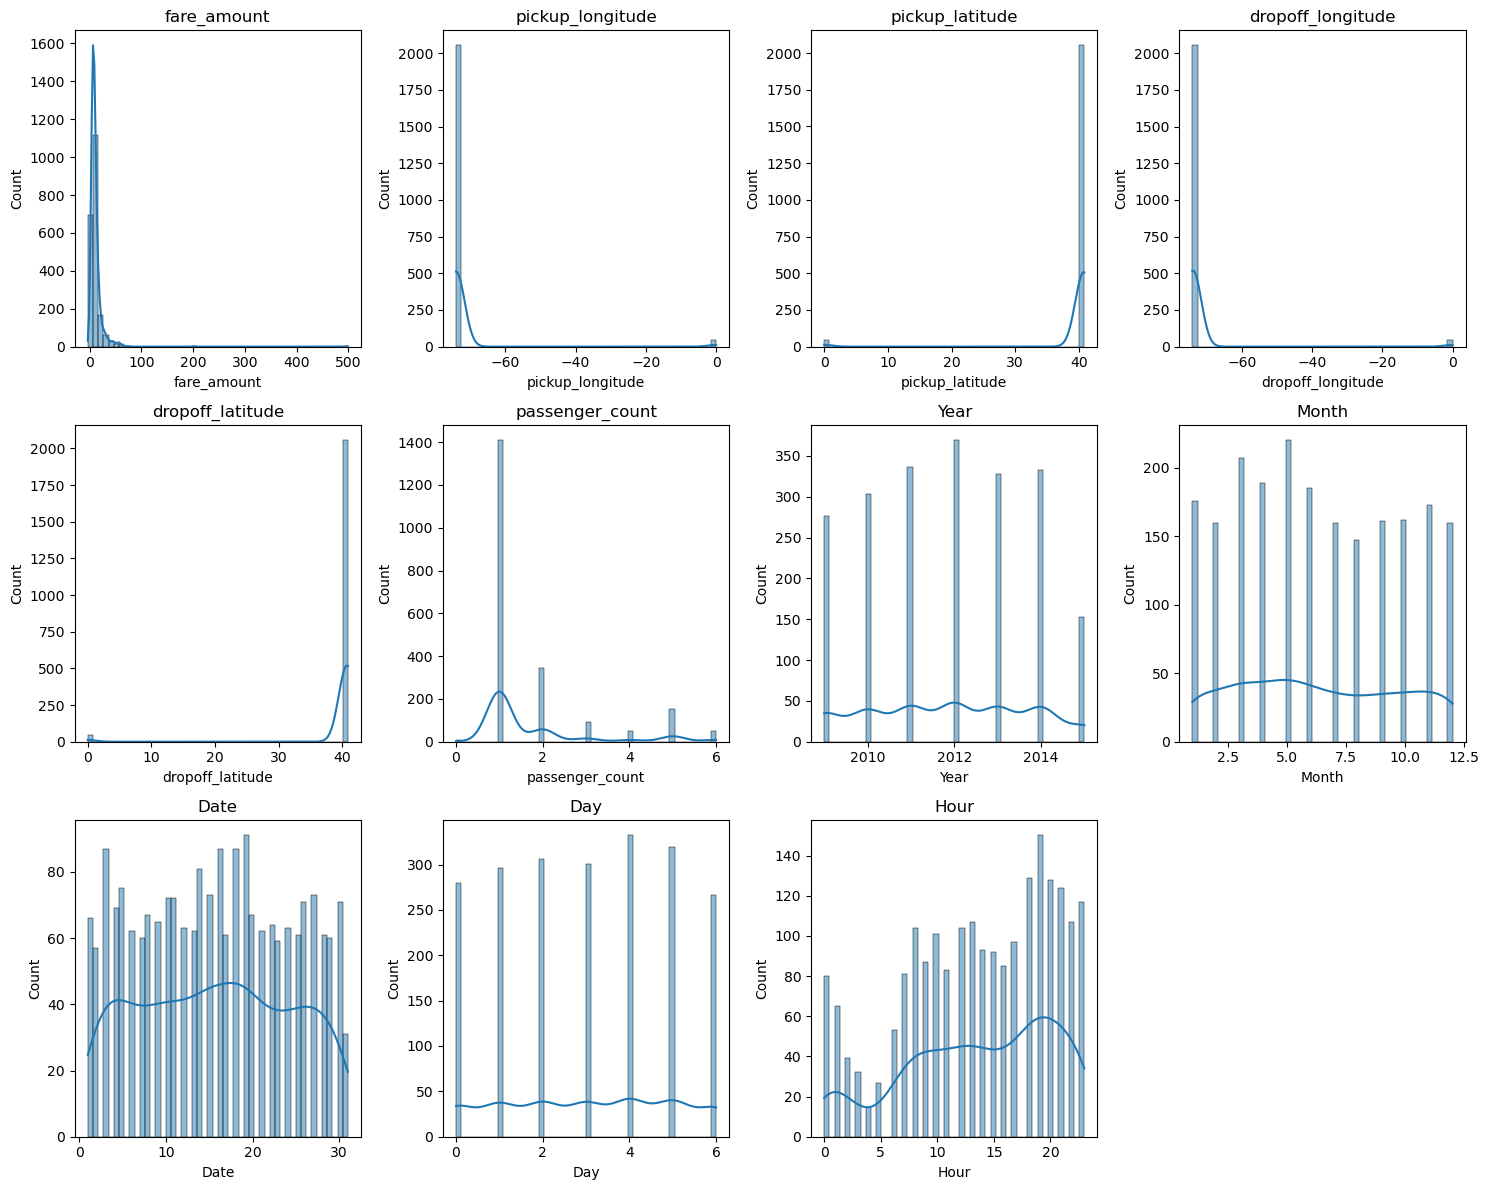

In [17]:
num_cols=df.select_dtypes(include=['int32','int64','float64']).columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(col)
plt.tight_layout()
plt.show()

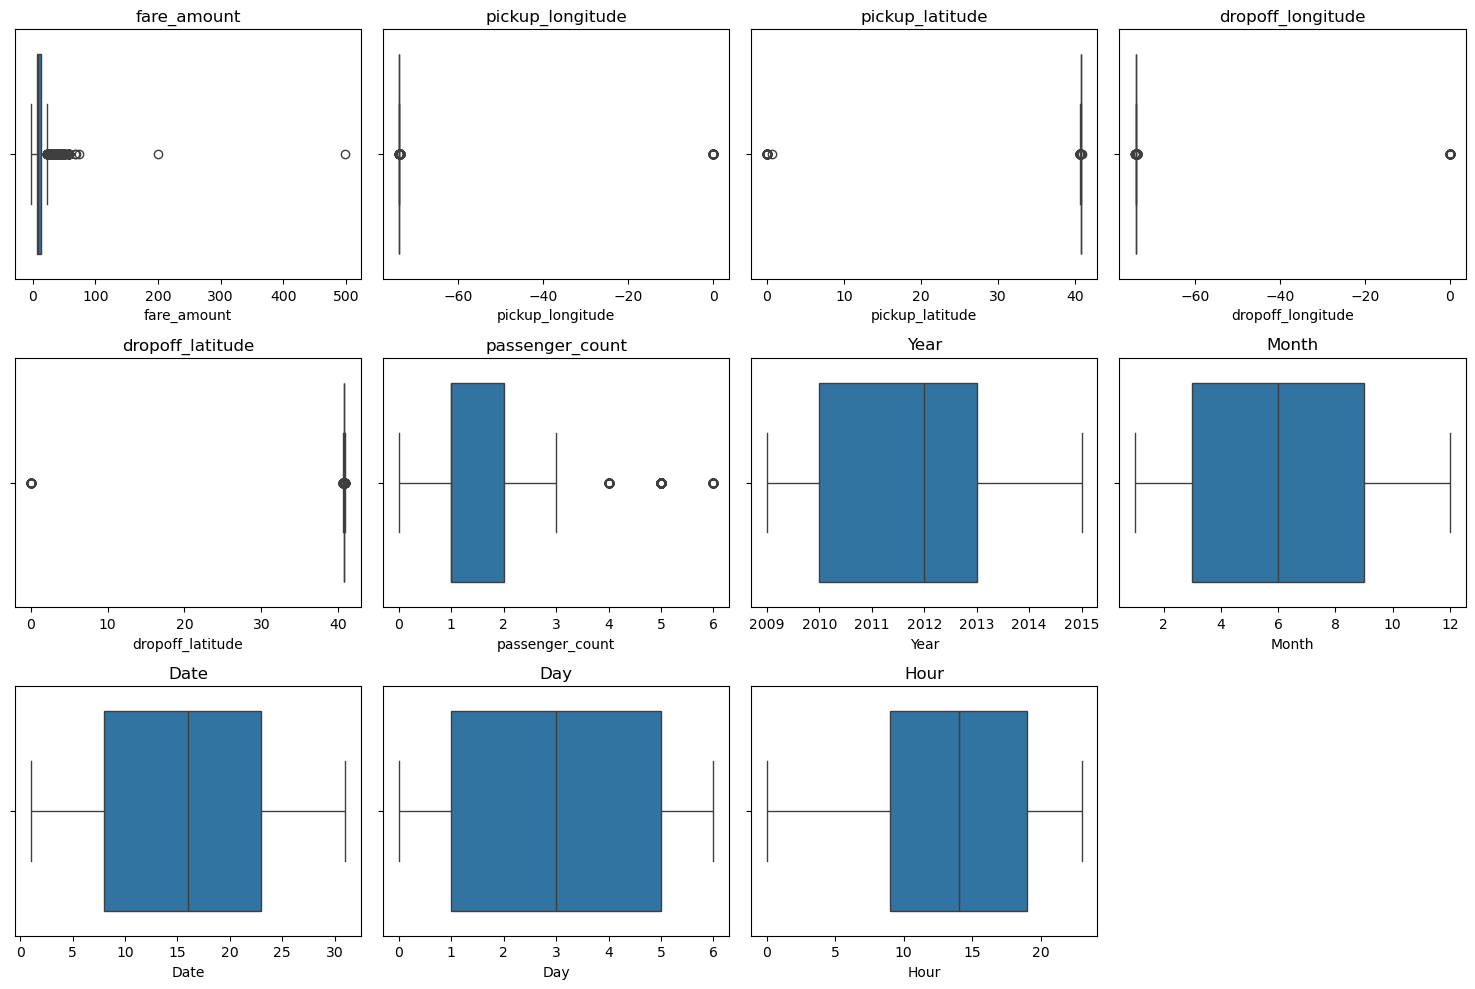

In [18]:
num_cols = df.select_dtypes(include=['int32','int64','float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [19]:
num_cols=df.select_dtypes(include=['int32','int64','float64'])
num_cols.skew()

fare_amount          19.904258
pickup_longitude      6.462364
pickup_latitude      -6.389826
dropoff_longitude     6.537161
dropoff_latitude     -6.536990
passenger_count       1.906708
Year                  0.008887
Month                 0.109831
Date                  0.015885
Day                  -0.032702
Hour                 -0.438564
dtype: float64

In [20]:
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 200)]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]
df = df[(df['pickup_latitude'] >= 40) & (df['pickup_latitude'] <= 42)]
df = df[(df['pickup_longitude'] >= -75) & (df['pickup_longitude'] <= -72)]
df = df[(df['dropoff_latitude'] >= 40) & (df['dropoff_latitude'] <= 42)]
df = df[(df['dropoff_longitude'] >= -75) & (df['dropoff_longitude'] <= -72)]

In [21]:
df.skew()

fare_amount          5.698499
pickup_longitude     3.497518
pickup_latitude     -0.998658
dropoff_longitude    2.316831
dropoff_latitude    -0.602409
passenger_count      1.908798
Year                 0.001930
Month                0.108286
Date                 0.025195
Day                 -0.032082
Hour                -0.437584
dtype: float64

In [22]:
df['passenger_count']=np.log1p(df['passenger_count'])

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']] = scaler.fit_transform(
    df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
)


In [24]:
df.skew()

fare_amount          5.698499
pickup_longitude     3.497518
pickup_latitude     -0.998658
dropoff_longitude    2.316831
dropoff_latitude    -0.602409
passenger_count      1.491687
Year                 0.001930
Month                0.108286
Date                 0.025195
Day                 -0.032082
Hour                -0.437584
dtype: float64

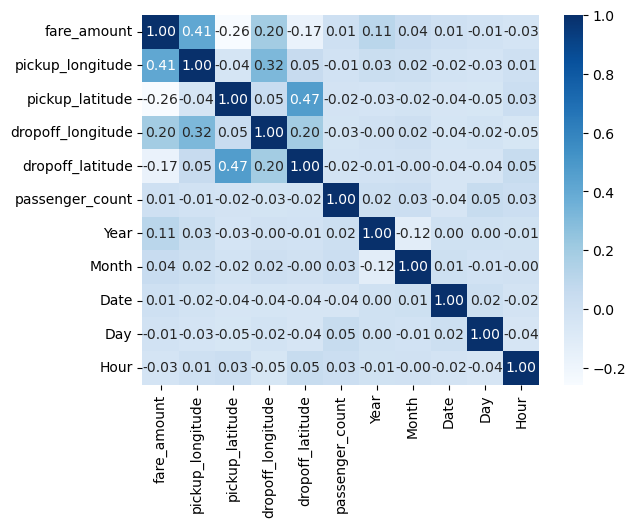

In [25]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues')
plt.show()

In [26]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour
fare_amount,1.000000,0.414909,-0.256148,0.195524,-0.171250,0.008071,0.105576,0.044148,0.006003,-0.011222,-0.034385
pickup_longitude,0.414909,1.000000,-0.035818,0.316468,0.053295,-0.011799,0.028456,0.020814,-0.019813,-0.032528,0.005198
pickup_latitude,-0.256148,-0.035818,1.000000,0.047192,0.469768,-0.024697,-0.031059,-0.017428,-0.042953,-0.045886,0.025570
dropoff_longitude,0.195524,0.316468,0.047192,1.000000,0.198881,-0.026410,-0.002074,0.015535,-0.037957,-0.019575,-0.046533
dropoff_latitude,-0.171250,0.053295,0.469768,0.198881,1.000000,-0.019374,-0.014750,-0.004523,-0.044364,-0.044278,0.050332
passenger_count,0.008071,-0.011799,-0.024697,-0.026410,-0.019374,1.000000,0.022913,0.026230,-0.041262,0.048723,0.026320
Year,0.105576,0.028456,-0.031059,-0.002074,-0.014750,0.022913,1.000000,-0.121281,0.000325,0.000333,-0.007041
Month,0.044148,0.020814,-0.017428,0.015535,-0.004523,0.026230,-0.121281,1.000000,0.009874,-0.014684,-0.004059
Date,0.006003,-0.019813,-0.042953,-0.037957,-0.044364,-0.041262,0.000325,0.009874,1.000000,0.021913,-0.024724
Day,-0.011222,-0.032528,-0.045886,-0.019575,-0.044278,0.048723,0.000333,-0.014684,0.021913,1.000000,-0.044300


In [27]:
df=df.drop(columns=['Month','Date','Day','Hour','passenger_count'])

In [28]:
df.to_csv('cleaned_dataset.csv',index=False)